# Variation of phase and power with size for 5.6GHz Bernard

Full size, no legs

In [ ]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as npt
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [25]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [26]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [27]:
scale_list = ['0206', '0553', '1000', '1588']
morpho = 'body'
wing_pos = 'M'
pol_list = ['H', 'V']
frequency_name = '560'
pitch = '0'

In [28]:
results_dict = {x : {y: None for y in scale_list} for x in pol_list}
ellipsoid_results_dict = {x : {y: None for y in scale_list} for x in pol_list}

In [29]:
for scale in scale_list:
    for pol in pol_list:

            path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/size_analysis_056/Bernard_parameterised_{frequency_name}_{pol}_{wing_pos}_{scale}_{morpho}_p0_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/size_analysis_056/Bernard_parameterised_{frequency_name}_{pol}_{wing_pos}_{scale}_{morpho}_p0_s0_df.csv'
            df.to_csv(output_path)
            results_dict[pol][scale] = df

In [30]:
for scale in scale_list:
    for pol in pol_list:

            path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/dict/size_analysis/Ellipsoid_parameterised_{frequency_name}_{pol}_{scale}_p{pitch}_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/size_analysis/Ellipsoid_parameterised_{frequency_name}_{pol}_{scale}_p{pitch}_s0__df.csv'
            df.to_csv(output_path)
            ellipsoid_results_dict[pol][scale] = df

# Functions

In [31]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase

def get_vertical_returned_phase(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    phase = np.angle(vertical_field) * 180 / np.pi
    return phase

def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

def get_vertical_returned_power(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    power = np.abs(vertical_field)**2
    return power

def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

# Power with size

Text(0.5, 1.0, 'Variation of normalised HH scattered power with moth scaling for H polarisation at 5.6GHz')

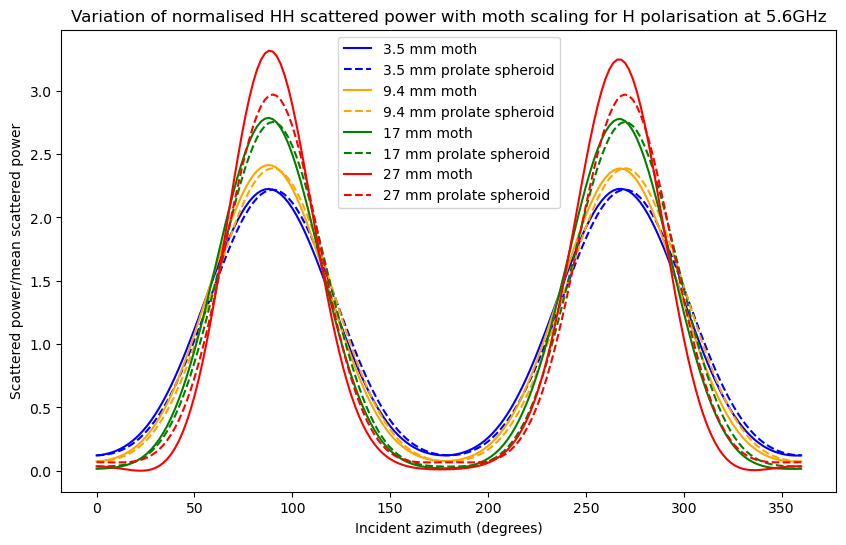

In [32]:
pol = 'H'

colours = ['blue', 'orange', 'green', 'red']
counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    df_bernard = results_dict[pol][scale]
    df_ellipsoid = ellipsoid_results_dict[pol][scale]

    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full/power_bernard_full.mean(), label=f'{length} mm moth', linestyle = '-', color=colour)
    plt.plot(df_ellipsoid['phi'], power_ellipsoid/power_ellipsoid.mean(), label=f'{length} mm prolate spheroid', linestyle = '--', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power/mean scattered power')
plt.title(f'Variation of normalised HH scattered power with moth scaling for {pol} polarisation at 5.6GHz')

Text(0.5, 1.0, 'Variation of normalised VV scattered power channel with moth scaling for V polarisation at 5.6GHz')

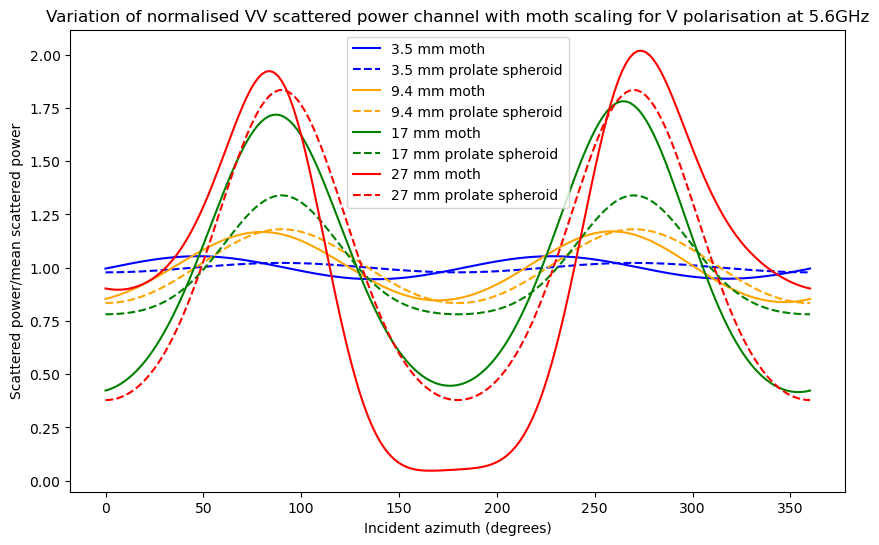

In [33]:
pol = 'V'

colours = ['blue', 'orange', 'green', 'red']
counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    df_bernard = results_dict[pol][scale]
    df_ellipsoid = ellipsoid_results_dict[pol][scale]

    power_bernard_full = get_vertical_returned_power(df_bernard)
    power_ellipsoid = get_vertical_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full/power_bernard_full.mean(), label=f'{length} mm moth', linestyle = '-', color=colour)
    plt.plot(df_ellipsoid['phi'], power_ellipsoid/power_ellipsoid.mean(), label=f'{length} mm prolate spheroid', linestyle = '--', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power/mean scattered power')
plt.title(f'Variation of normalised VV scattered power channel with moth scaling for {pol} polarisation at 5.6GHz')

Text(0.5, 1.0, 'Variation of differential reflectivity with scale at 5.6GHz')

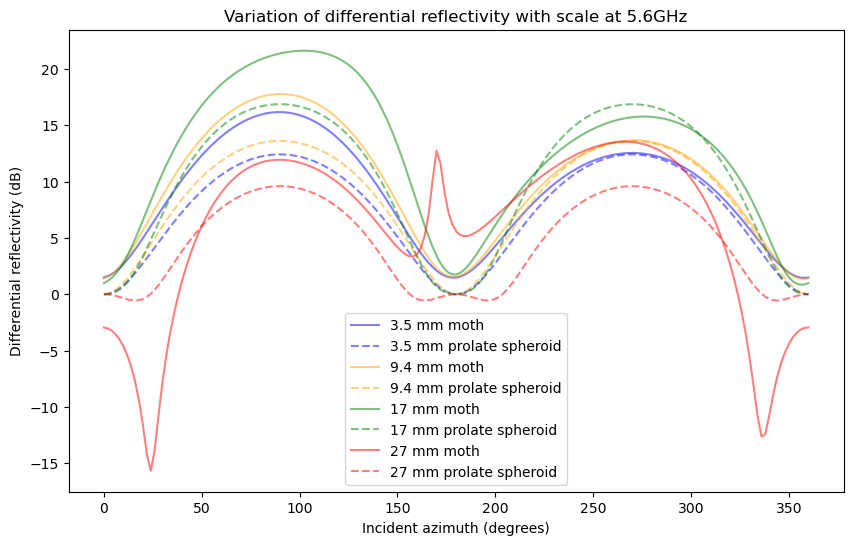

In [34]:
pol = 'H'

counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_reflectivity()
    dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_reflectivity()

    plt.plot(df_bernard['phi'], dp_moth.differential_reflectivity, label=f'{length} mm moth', linestyle = '-', alpha=0.5, color=colour)
    plt.plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{length} mm prolate spheroid', linestyle = '--', alpha=0.5, color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of differential reflectivity with scale at 5.6GHz')

Text(0.5, 1.0, 'Variation of LDR with Moth Scaling at 5.6GHz')

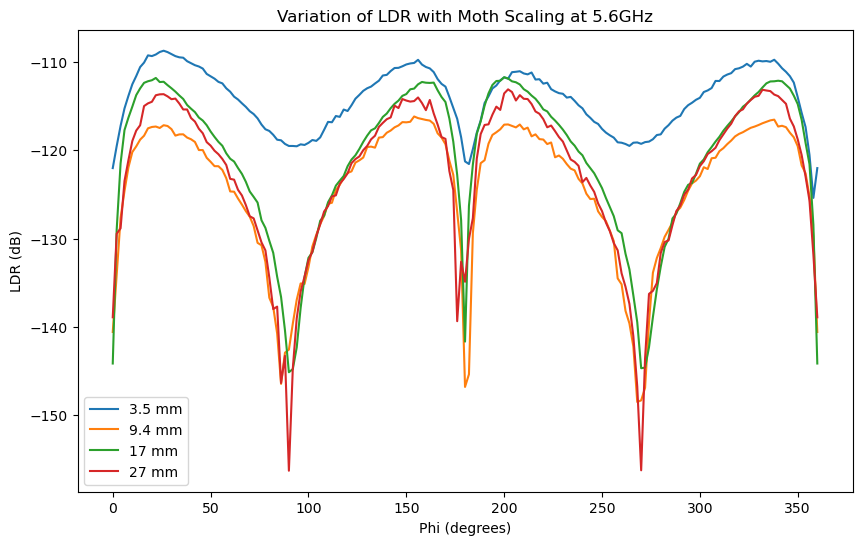

In [35]:
pol = 'H'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = ellipsoid_results_dict[pol][scale]
    ldr = get_linear_depol_ratio(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldr, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('LDR (dB)')
plt.title(f'Variation of LDR with Moth Scaling at 5.6GHz')

# Phase with size

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident H radiation for Moth at 5.6 GHz')

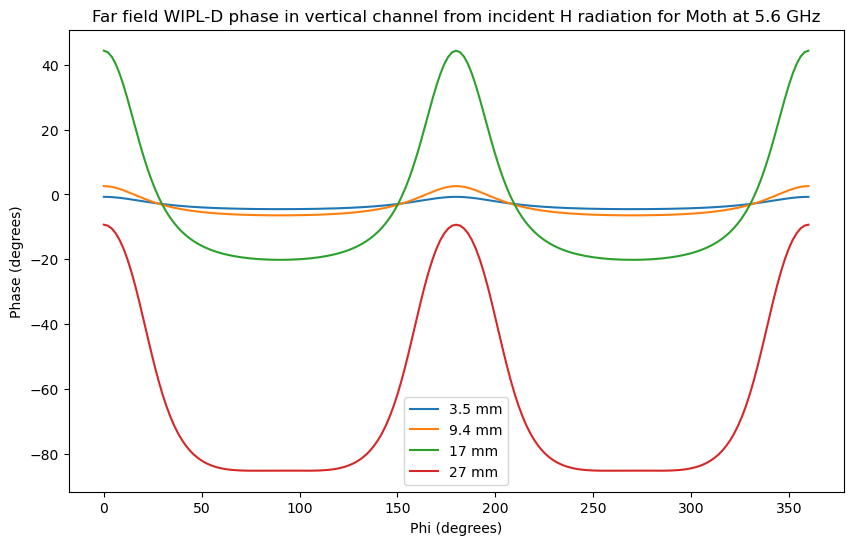

In [36]:
pol = 'H'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = ellipsoid_results_dict[pol][scale]
    phase = get_horizontal_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in vertical channel from incident {pol} radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident V radiation for Moth at 5.6 GHz')

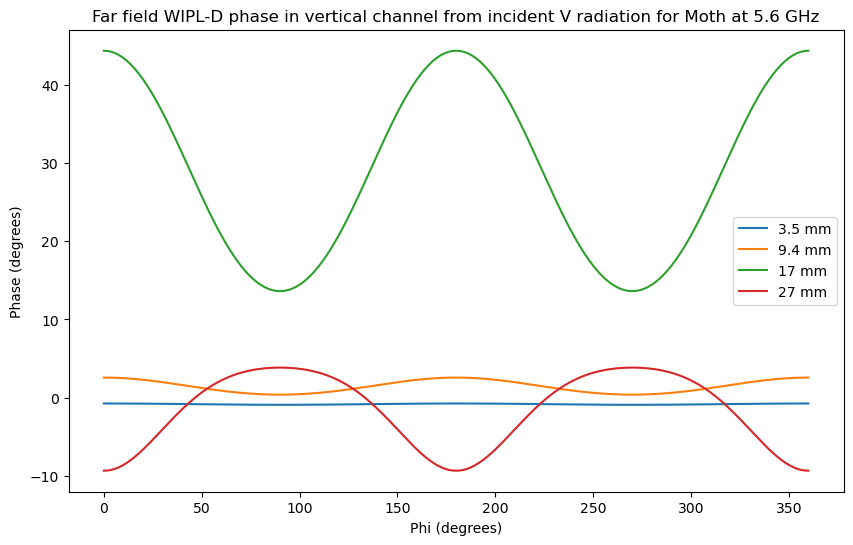

In [37]:
pol = 'V'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = ellipsoid_results_dict[pol][scale]
    phase = get_vertical_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in vertical channel from incident {pol} radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Variation of differential phase with scale at 5.6GHz')

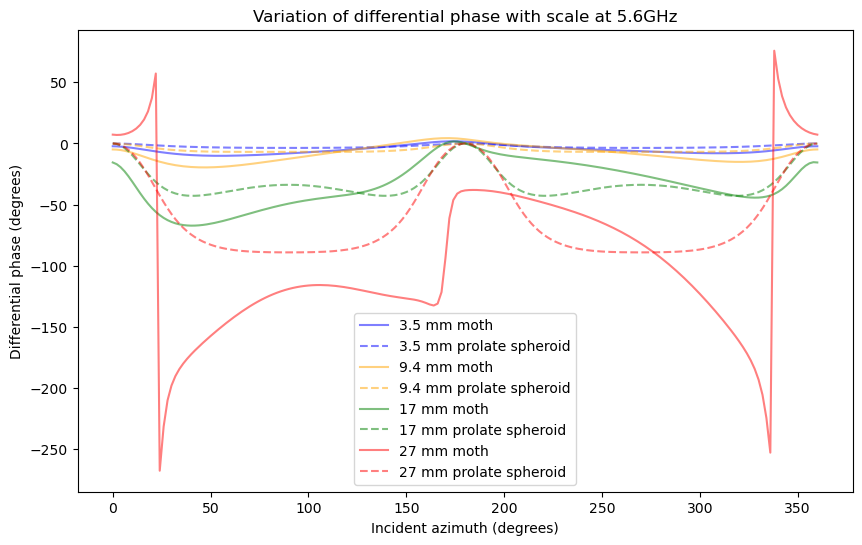

In [38]:
counter=0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_phase()
    dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], dp_moth.differential_phase, label=f'{length} mm moth', linestyle = '-', color=colour, alpha=0.5)
    plt.plot(df_bernard['phi'], dp.differential_phase, label=f'{length} mm prolate spheroid', linestyle = '--', color=colour, alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of differential phase with scale at 5.6GHz')

## Figures for AMS poster

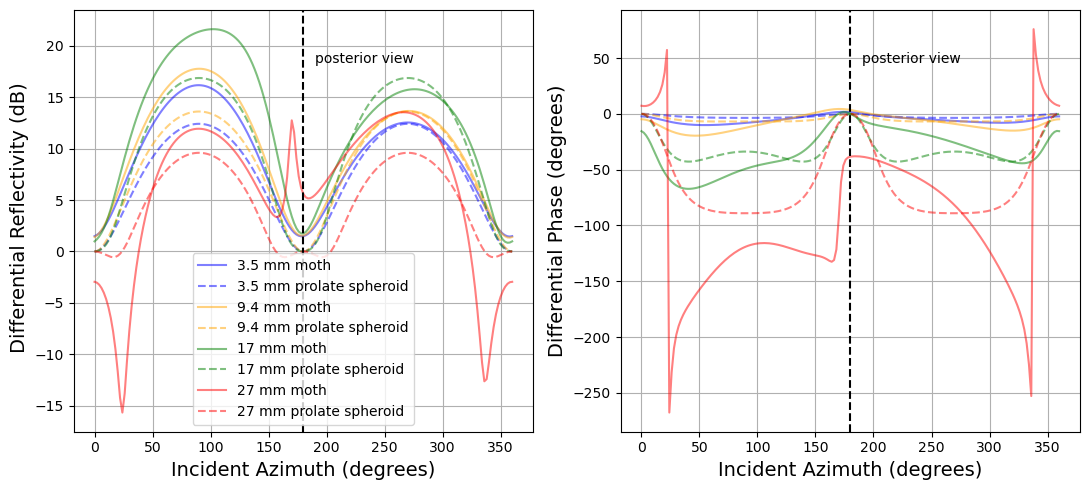

In [39]:
fig, axes = plt.subplots(1,2, figsize=(11,5))

#colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

pol = 'H'

counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_reflectivity()
    dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_reflectivity()

    axes[0].plot(df_bernard['phi'], dp_moth.differential_reflectivity, label=f'{length} mm moth', linestyle = '-', alpha=0.5, color=colour)
    axes[0].plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{length} mm prolate spheroid', linestyle = '--', alpha=0.5, color=colour)

counter=0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_phase()
    dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    axes[1].plot(df_bernard['phi'], dp_moth.differential_phase, label=f'{length} mm moth', linestyle = '-', color=colour, alpha=0.5)
    axes[1].plot(df_bernard['phi'], dp.differential_phase, label=f'{length} mm prolate spheroid', linestyle = '--', color=colour, alpha=0.5)

# for counter, phi_T_deg in enumerate(phi_T_list):
#     axes[0].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential reflectivity'], label=f"{phi_T_deg}°")#, color =colors[counter])
#     axes[1].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential Phase'], label=f"{phi_T_deg}°")#, color =colors[counter])

for ax in axes:
    # Draw the vertical line
    ax.axvline(x=180, linestyle='--', color='black')
    
    # Get current y-limits to place text in the middle
    y_min, y_max = ax.get_ylim()
    y_pos = y_max - (y_max - y_min) * 0.1  # 10% below top

    # Add text label near the line
    ax.text(190, y_pos, 'posterior view', rotation=0, va='top', ha='left', color='black')
    ax.grid()


axes[0].legend()
axes[0].set_ylabel(' Differential Reflectivity (dB)', fontsize =14)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =14)


#fig.suptitle('Sensitivity of the dual-polarisation scattering properties to differential phase on transmission with 10 degree pitch',fontsize=13)

fig.tight_layout()

fig.savefig('./AMS_poster_plots/size_variation.svg')

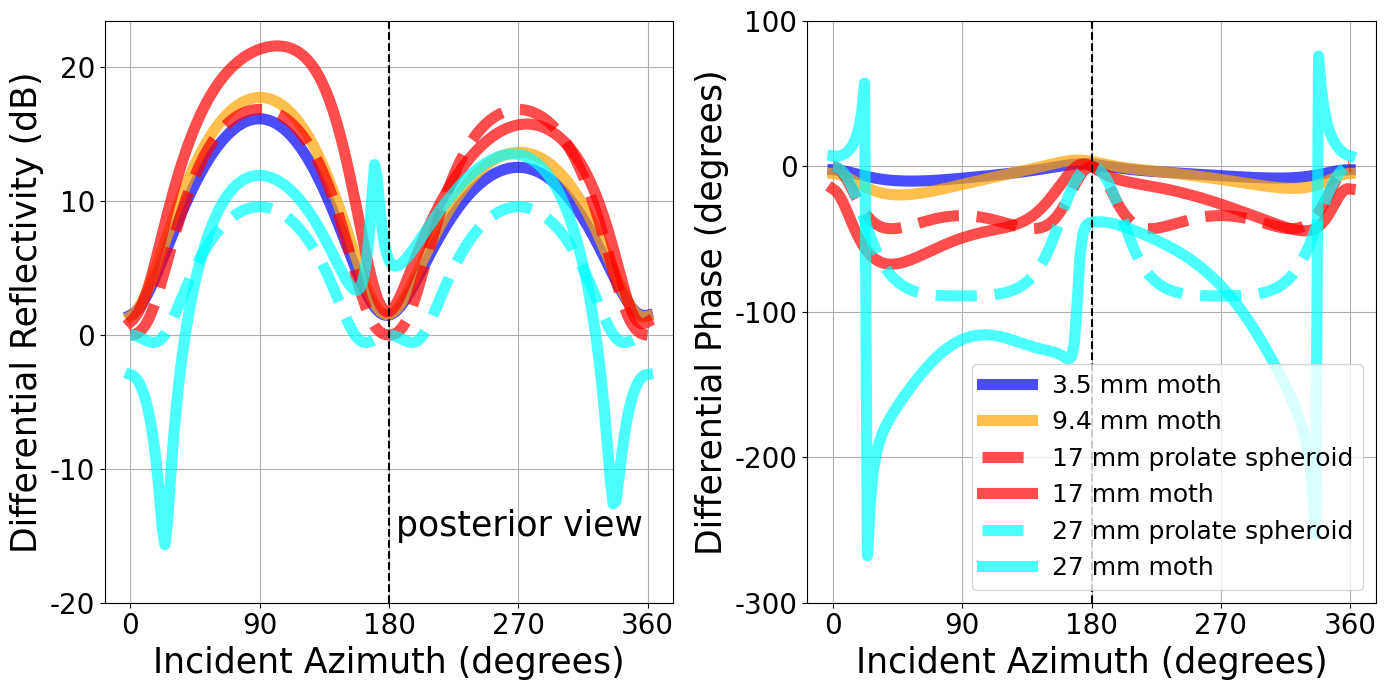

In [69]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

#colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

pol = 'H'

fontsize=25
linewidth=8
alpha=0.7
counter = 0
colours = ['blue', 'orange', 'red', 'cyan', 'brown',  'brown', 'pink']
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_reflectivity()
    dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_reflectivity()

    axes[0].plot(df_bernard['phi'], dp_moth.differential_reflectivity, label=f'{length} mm moth', linestyle = '-', alpha=alpha, color=colour, linewidth=linewidth)
    
    if scale in ['1000', '1588']:
        axes[0].plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{length} mm prolate spheroid', linestyle = '--', alpha=alpha, color=colour, linewidth=linewidth)

counter=0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    dp_moth = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp_moth._calculate_differential_phase()

    if scale in ['1000', '1588']:
        dp = DualPol(ellipsoid_results_dict['H'][scale], ellipsoid_results_dict['V'][scale], read_from_df=True)
        dp._calculate_differential_phase()
        axes[1].plot(df_bernard['phi'], dp.differential_phase, label=f'{length} mm prolate spheroid', linestyle = '--', color=colour, alpha=alpha, linewidth=linewidth)
    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    axes[1].plot(df_bernard['phi'], dp_moth.differential_phase, label=f'{length} mm moth', linestyle = '-', color=colour, alpha=alpha, linewidth=linewidth)
    

# for counter, phi_T_deg in enumerate(phi_T_list):
#     axes[0].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential reflectivity'], label=f"{phi_T_deg}°")#, color =colors[counter])
#     axes[1].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential Phase'], label=f"{phi_T_deg}°")#, color =colors[counter])

for ax in axes:
    # Draw the vertical line
    ax.axvline(x=180, linestyle='--', color='black')
    
    # Get current y-limits to place text in the middle
    y_min, y_max = ax.get_ylim()
    y_pos = y_max - (y_max - y_min) * 0.1  # 10% below top

    # Add text label near the line
    #ax.text(190, y_pos, 'posterior view', rotation=0, va='top', ha='left', color='black')
    ax.grid()

axes[0].text(185, -13, 'posterior view', rotation=0, va='top', ha='left', color='black', fontsize=fontsize)

axes[1].legend(fontsize=18)
axes[0].set_ylabel('Differential Reflectivity (dB)', fontsize =fontsize)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =fontsize)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =fontsize)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =fontsize)

for ax in axes:
    ax.set_xticks([0,90,180,270,360])                      # positions
    ax.set_xticklabels([0,90,180,270,360], fontsize=20)    # labels + fontsize

axes[0].set_yticks([-20, -10, 0, 10, 20])
axes[0].set_yticklabels([-20, -10, 0, 10, 20], fontsize=20)  

axes[1].set_yticks([-300,-200, -100, 0, 100])
axes[1].set_yticklabels([-300,-200, -100, 0, 100], fontsize=20)  

# axes[1].set_yticks([-250,-200, -150, -100, -50, 0,50])
# axes[1].set_yticklabels([-250,-200, -150,-100, -50, 0,50], fontsize=20)  
#fig.suptitle('Sensitivity of the dual-polarisation scattering properties to differential phase on transmission with 10 degree pitch',fontsize=13)

fig.tight_layout()

fig.savefig('./AMS_poster_plots/size_variation_v3_cb_friendly.svg')